# Analysis - exp54

- MCTS replicates c=1.26, num_sim=2000

In [1]:
import os
import csv
import numpy as np
import torch as th

from glob import glob
from pprint import pprint

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from notebook_helpers import load_params
from notebook_helpers import load_monitored
from notebook_helpers import join_monitored
from notebook_helpers import score_summary

def load_data(path, run_index=(0, 20)):
    runs = range(run_index[0], run_index[1]+1)
    exps = []
    for r in runs:
        file = os.path.join(path, "run_{}_monitor.csv".format(int(r)))
        try:
            mon = load_monitored(file)
        except FileNotFoundError:
            mon = None
        exps.append(mon)
    return exps

# Load data

In [2]:
path = "/Users/qualia/Code/azad/data/wythoff/exp54/"
exp_54 = load_data(path, run_index=(2, 20))

In [4]:
print(len(exp_54))

19


In [5]:
pprint(exp_54[1].keys())
pprint(exp_54[1]['score'][:20])

dict_keys(['file', 'episode', 'score'])
[0.0,
 1.0,
 0.6666666666666666,
 0.6666666666666666,
 0.6,
 0.6,
 0.5714285714285714,
 0.45454545454545453,
 0.45454545454545453,
 0.4166666666666667,
 0.4166666666666667,
 0.4166666666666667,
 0.4166666666666667,
 0.46153846153846156,
 0.42857142857142855,
 0.4,
 0.4117647058823529,
 0.3888888888888889,
 0.3684210526315789,
 0.3684210526315789]


# Plots

Timecourse

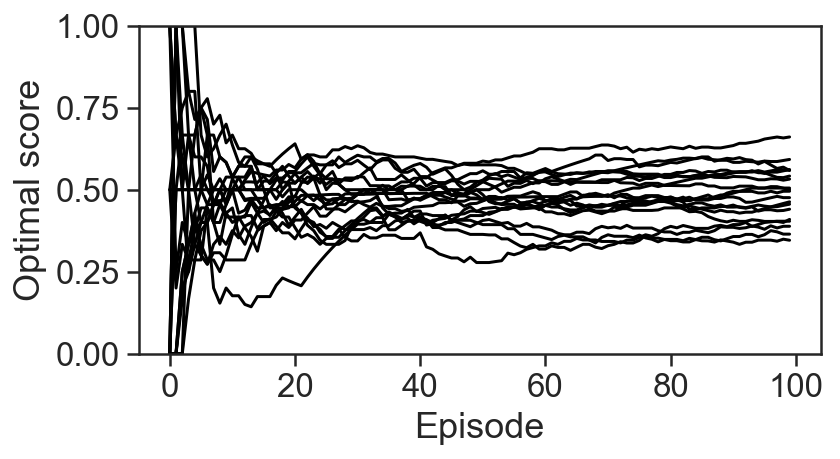

In [6]:
plt.figure(figsize=(6, 3))
for r, mon in enumerate(exp_54):
    if mon is not None:
        _ = plt.plot(mon['episode'], mon['score'], color='black')
        _ = plt.ylim(0, 1)
_ = plt.ylabel("Optimal score")
_ = plt.tight_layout()                                    
_ = plt.xlabel("Episode")

### Histograms of final 10 samples

The expected max score is 0.49212362738134285


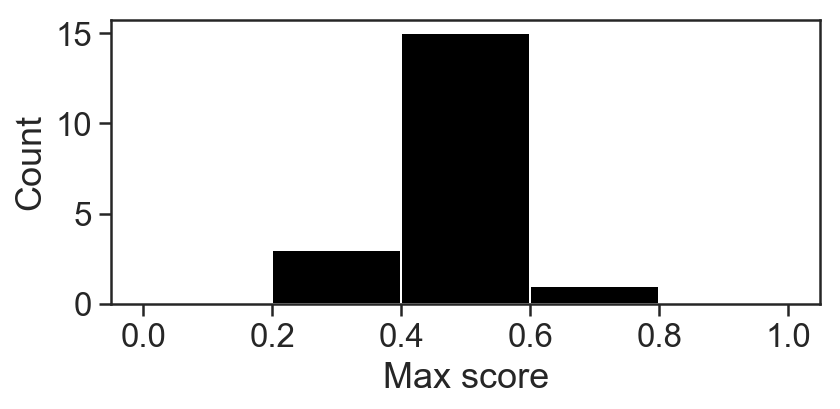

In [12]:
data = []
plt.figure(figsize=(6, 3))
for r, mon in enumerate(exp_54):
    if mon is not None:
        data.append(np.max(mon['score'][-10:-1]))                
        
_ = plt.hist(data, bins=5, range=(0,1), color='black')
_ = plt.xlabel("Max score")
_ = plt.ylabel("Count")
_ = plt.tight_layout() 

print(f"The expected max score is {np.mean(data)}")

The expected mean score is 0.48472909671355685


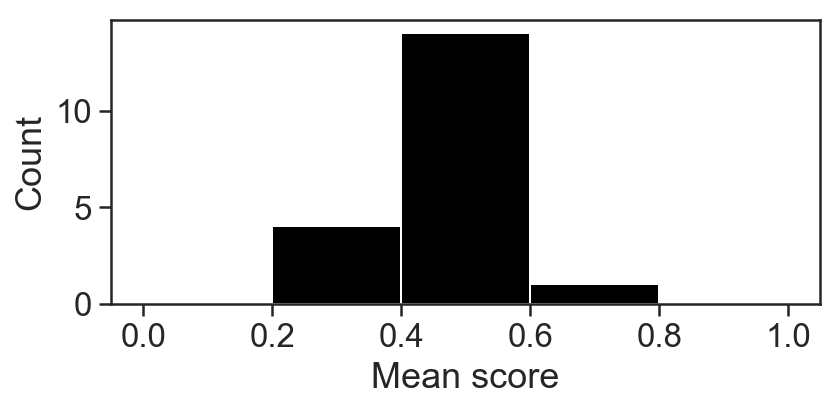

In [13]:
data = []
plt.figure(figsize=(6, 3))
for r, mon in enumerate(exp_54):
    if mon is not None:
        data.append(np.mean(mon['score'][-10:-1]))                

_ = plt.hist(data, bins=5, range=(0,1), color='black')
_ = plt.xlabel("Mean score")
_ = plt.ylabel("Count")
_ = plt.tight_layout()       

print(f"The expected mean score is {np.mean(data)}")

The expected median score is 0.4705200814199561


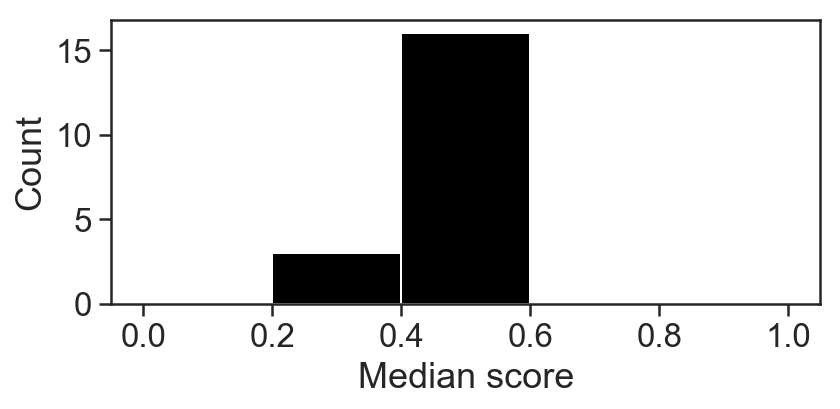

In [14]:
data = []
plt.figure(figsize=(6, 3))
for r, mon in enumerate(exp_54):
    if mon is not None:
        data.append(np.median(mon['score'][-100:-1]))                

_ = plt.hist(data, bins=5, range=(0,1), color='black')
_ = plt.xlabel("Median score")
_ = plt.ylabel("Count")
_ = plt.tight_layout()  

print(f"The expected median score is {np.mean(data)}")